Nama: Rio Tri Wibowo

Kelas: Statistika Multivariat-B

NIM: 11220940000004

## Latar Belakang

Aplikasi e-learning memiliki banyak fitur yang dirancang untuk mendukung proses belajar. Namun, tidak semua fitur digunakan secara merata oleh mahasiswa. Oleh karena itu, penting untuk mengetahui kombinasi fitur mana yang menjangkau sebagian besar mahasiswa (reach) dan seberapa sering fitur-fitur tersebut digunakan (frequency).

## Rumusan Masalah
Dalam mengembangkan aplikasi e-learning, perlu memperhatikan bagaimana mahasiswa memanfaatkan berbagai fitur dalam aplikasi e-learning. Permasalahan utamanya adalah fitur-fitur e-learning apa saja yang paling banyak digunakan oleh mahasiswa dan bagaimana kombinasi fitur-fitur tersebut dapat menjangkau mahasiswa secara optimal. Selain itu, penelitian ini juga ingin mengetahui kombinasi fitur yang mampu menjangkau sebagian besar mahasiswa secara unik (unduplicated reach), serta bagaimana sebaran penggunaan fitur tersebut jika ditinjau dari aspek tingkatan semester mahasiswa. Melalui pendekatan analisis TURF, penelitian ini berupaya menjawab pertanyaan-pertanyaan tersebut guna menghasilkan rekomendasi pengembangan fitur yang lebih efisien dan tepat sasaran

## Tujuan


*   Menganalisis fitur e-learning yang paling banyak digunakan oleh mahasiswa.
*   Menentukan kombinasi optimal fitur e-learning berdasarkan analisis TURF untuk menjangkau sebanyak mungkin pengguna unik.
*   Memberikan rekomendasi fitur utama yang dapat difokuskan dalam pengembangan aplikasi.





## Metode



*   Nama Metode:
TURF Analysis (Total Unduplicated Reach and Frequency)

*   Tujuan Metode:
Metode TURF bertujuan untuk mengidentifikasi kombinasi fitur e-learning yang secara bersama-sama dapat menjangkau jumlah responden unik terbanyak.

*   Alasan Pemilihan Metode:
Metode TURF dipilih karena mampu mengidentifikasi kombinasi fitur yang menjangkau pengguna terbanyak. Ini membantu untuk menentukan fitur mana yang paling efektif digunakan oleh mahasiswa dan memastikan jangkauan maksimal dengan jumlah fitur yang minimal.





## Asumsi

Setiap fitur dalam aplikasi e-learning memiliki peluang yang sama untuk dipilih dan diakses.
Artinya, tidak ada fitur yang "tersembunyi" atau secara teknis lebih sulit dijangkau oleh pengguna.

## Input Modul

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Generate Data Random

In [2]:
# Daftar jurusan dan fitur aplikasi
majors = ['Matematika', 'Fisika', 'Statistika', 'Kimia', 'Biologi']
features = [
    'Forum_Diskusi', 'Video_Interaktif', 'Kuis_Otomatis', 'Feedback_Dosen',
    'Reminder_Jadwal', 'Download_Materi', 'Live_Chat', 'AI_Pembantu',
    'Gamifikasi', 'Quiz_Bersertifikat', 'Simulasi', 'Pembelajaran_Adaptif'
]

# Jumlah responden
num_students = 400
np.random.seed(42)

# Buat dictionary data
data = {
    'Id': np.arange(1, num_students + 1),
    'Jurusan': np.random.choice(majors, num_students),
    'Semester': np.random.randint(1, 9, num_students),  # Semester 1–8
}

# Generate nilai 0/1 untuk setiap fitur
for feature in features:
    data[feature] = np.random.binomial(1, 0.5, num_students)

# Buat DataFrame
maindf = pd.DataFrame(data)

# Simpan ke file CSV dan XLS
maindf.to_csv('data_survey_random_elearning.csv', index=False)
maindf.to_excel('data_survey_random_elearning.xlsx', index=False)



# Tampilkan 5 baris awal
maindf.head()


,Id,Jurusan,Semester,Forum_Diskusi,Video_Interaktif,Kuis_Otomatis,Feedback_Dosen,Reminder_Jadwal,Download_Materi,Live_Chat,AI_Pembantu,Gamifikasi,Quiz_Bersertifikat,Simulasi,Pembelajaran_Adaptif
0,1,Kimia,8,1,0,1,0,0,1,1,1,0,0,0,0
1,2,Biologi,3,1,1,1,1,0,1,1,1,1,0,0,0
2,3,Statistika,5,1,1,0,1,1,0,0,0,0,1,0,1
3,4,Biologi,6,1,1,1,0,1,0,1,0,1,1,0,0
4,5,Biologi,1,1,0,1,0,1,1,1,1,0,1,1,0


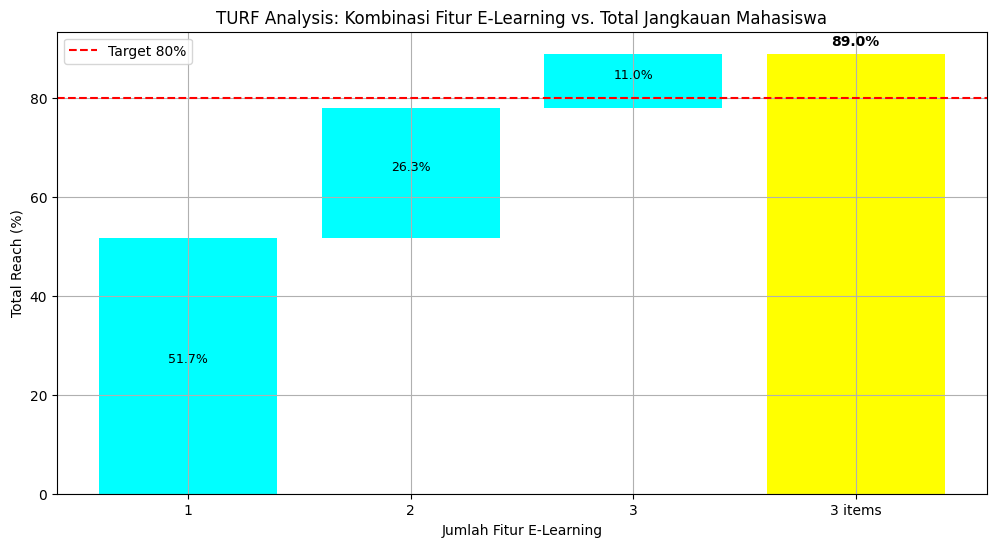

Untuk mencapai minimal 80%, perlu 3 Fitur E-Learning.

 fitur e-learning agar mencapai target : ['Video_Interaktif', 'Kuis_Otomatis', 'Live_Chat']


In [3]:
# @title Reach vs. Jumlah Main Features
data_used = maindf #@param {type:"string"}
Semester = 'All' # @param ["All", "1", "2", "3", "4", "5", "6", "7", "8"]
Target_dalam_persen = 80 # @param

if Semester != 'All':
  data_used = data_used[data_used['Semester Mahasiswa']==Semester] #Filter semester

if len(data_used)==0:
    raise SystemExit("Data kosong! Program dihentikan.")

target_reach_pct = Target_dalam_persen/100
target_reach = int(target_reach_pct * len(data_used))


index_ = data_used.columns.get_loc("Forum_Diskusi")   #nomor kolom data
reach_per_item = data_used[data_used.keys()[(index_):]].sum(axis=0).sort_values(ascending=False)   #hitung frekuensi lalu sorting dari yang terbesar

#Algoritma Greedy untuk menemukan kombinasi optimal
selected_items = []
current_reach = set()
reach_progress = []

for item in reach_per_item.index:    #hitung reach
    new_reach = current_reach | set(data_used.index[data_used[item] == 1])  # Tambah reach baru
    selected_items.append(item)
    reach_progress.append(len(new_reach) / len(data_used))  # Simpan progres reach

    if len(new_reach) >= target_reach:
        break  # Selesai jika sudah mencapai target

    current_reach = new_reach  # Perbarui reach

# Hitung incremental reach
incrementals = [reach_progress[0]] + [reach_progress[i] - reach_progress[i-1] for i in range(1, len(reach_progress))]


# Bar chart bertingkat
plt.figure(figsize=(12, 6))
bottoms = 0
for i, inc in enumerate(incrementals):
    plt.bar("{}".format(i+1), inc * 100, bottom=bottoms, color="#00ffff")
    plt.text(i, bottoms + inc*50, f"{inc*100:.1f}%", ha='center', va='bottom', fontsize=9)
    bottoms += inc * 100
plt.axhline(y=target_reach_pct * 100, color='r', linestyle='--', label=f'Target {target_reach_pct*100:.0f}%')


# Bar terakhir (semua item, misal 50)
total_reach = len(set(data_used.index[data_used[selected_items[-1]] == 1])) / len(data_used)
plt.bar(f"{len(selected_items)} items", reach_progress[-1] * 100, color="yellow")
plt.text(len(selected_items), reach_progress[-1] * 100 + 1, f"{reach_progress[-1]*100:.1f}%",
         ha='center', va='bottom', fontsize=10, fontweight='bold')

#Label
plt.xlabel("Jumlah Fitur E-Learning")
plt.ylabel("Total Reach (%)")
plt.title("TURF Analysis: Kombinasi Fitur E-Learning vs. Total Jangkauan Mahasiswa")
plt.legend()
plt.grid(True)
plt.savefig('reach_vs_elearningfeatures.png')
plt.show()


#Output hasil
max_reach = max(reach_progress)  # Ubah ke persen

if max_reach>=target_reach_pct:
  print(f"Untuk mencapai minimal {target_reach_pct*100:.0f}%, perlu {len(selected_items)} Fitur E-Learning.")
else:
  print(f"Tidak dapat mencapai {target_reach_pct*100:.0f}%.")
  print(f"maksimal hanya {max_reach*100:.0f}%, dengan {len(selected_items)} OOH")

print("\n fitur e-learning agar mencapai target :", selected_items[:len(selected_items)])  # Menampilkan fitur e-learning agar optimal


## Hasil Interpretasi


*   Tujuan analisis ini adalah mengidentifikasi kombinasi fitur e-learning yang mampu menjangkau minimal 80% mahasiswa pada setiap kelompok semester, karena kebutuhan dan kebiasaan mahasiswa bisa berbeda tergantung tingkat semester.

*   Hasil analisis menunjukkan bahwa kombinasi fitur yang optimal dapat berbeda antar semester. Artinya, fitur yang efektif menjangkau mahasiswa semester awal belum tentu sama efektifnya untuk semester akhir.



*   Fitur yang dominan menjangkau target minimal keseluruhan semester mahasiswa adalah **"Video Interaktif", "Kuis Otomatis", dan "Live Chat"**


*   Fitur yang dominan menjangkau mahasiswa *semester awal (semester 1-3)* adalah **"Video Interaktif", "Forum Diskusi", dan "Live Chat"**. Kombinasi ketiganya mencapai lebih dari 80% jangkauan pada kelompok ini.

*   Fitur yang dominan menjangkau mahasiswa *semester menengah (semester 4-6)* adalah **"Kuis Otomatis", "Reminder Tugas", dan "Forum Diskusi"**. Kombinasi ketiganya mencapai lebih dari 80% jangkauan pada kelompok ini.

*   Fitur yang dominan menjangkau mahasiswa *semester akhir (semester 7-8)* adalah **"Live Chat", "Download Materi", dan "Kuis Otomatis"**. Kombinasi ketiganya mencapai lebih dari 80% jangkauan pada kelompok ini.



